In [58]:
import pickle
import matplotlib.pyplot as plt
# Notes: 
# Plot stage 0 total-trials minus violations

#pwm = A_df.copy()
#pwm.head()
#pwm1 = pwm.reset_index()
#pwm1.head()
#mask = pwm['stage']== 0
#pwm1 = pwm[mask]
#print(pwm1)
#pwm1 = pwm[pwm.stage==0]
#pwm1.head()
#print(pwm1)
#pwm2 = pwm1.unstack()
#pwm2.head()
#pwm2[pwm2.stage== 0]
#print(idx)

#stage_0 = pwm.loc[pwm['stage']==0]

#print(pwm[pwm['stage']==0])
#print(pwm_stage0)

#idx = pwm[pwm['stage'==0]].index.tolist()
#print(idx)
#print(idx[:])
#print(idx[-1])
#print(len(idx))
#pwm_idx = pwm.loc[idx[0]:'2019-05-20']
#print(pwm_idx)
# ideally find the index for stage = 0 and use this for the plotting
#pwm_stage0_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
#plt.xticks(rotation = 75, fontsize= 'medium')
#plt.xlim(['2019-04-26','2019-05-20'])
#print(plt.get_xlim*())
#plt.ylabel('Done Trials')
#plt.xlabel('Date')
#plt.title('Stage 0: Done trials for PWM animals')
#print(pwm_stage0_cp.index)


# load in file

In [222]:
pickle_in = open("Rot3_data\\Rat_full_df.pkl","rb")
pwm = pickle.load(pickle_in)
pwm = pwm.sort_index()  # sort according to index, this should sort according to date
print("Succesfully loaded full rat dateframe as pwm")
pwm = pwm.rename_axis(['animal','date2'])  #Add labels for Multi-index
# Fix stages problem!!
mask = (pwm['stage']==1)&(pwm['A2_time']>0)
pwm['stage']=pwm['stage'].mask(mask,2)
pwm.head()
print(pwm.index)
# Include only animals which are on the PWM (should make this dependent on their settings file in the future
pwm = pwm.loc[['AA02','AA04','AA06','AA08','DO01','DO02','DO05','DO06','SC01','SC02','SC03','SC06','VP02','VP03','VP06']]



Succesfully loaded full rat dateframe as pwm
MultiIndex(levels=[['AA01', 'AA02', 'AA03', 'AA04', 'AA05', 'AA06', 'AA07', 'AA08', 'DO01', 'DO02', 'DO03', 'DO04', 'DO05', 'DO06', 'DO07', 'DO08', 'SC01', 'SC02', 'SC03', 'SC04', 'SC05', 'SC06', 'VP01', 'VP02', 'VP03', 'VP04', 'VP05', 'VP06', 'VP07', 'VP08', 'do06', 'sc04'], ['2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03', '2019

In [223]:
%matplotlib inline
A_df = pwm # use the pwm dataframe
A_df = A_df.swaplevel('animal','date2')
A_df = A_df.reset_index()  # In order to delete duplicates 
# remove duplicates
dup_r = A_df[A_df.duplicated(['date2','animal'])]
print('dub is:',dup_r)
A_df = A_df.drop_duplicates(['date2','animal'])
dup_r = A_df[A_df.duplicated(['date2','animal'])]  # Run a little double check
print('dub is:',dup_r)
# Put the dataframe nicely together again
A_df = A_df.set_index(['date2','animal'])
A_df = A_df.sort_index()
A_df = A_df.unstack()
A_df.head()



dub is:           date2 animal                                           file  \
85   2019-06-11   AA04  data_@AthenaDelayComp_athena_AA04_190611b.mat   
86   2019-06-11   AA04  data_@AthenaDelayComp_athena_AA04_190611c.mat   
208  2019-07-04   AA08  data_@AthenaDelayComp_athena_AA08_190704c.mat   
269  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425b.mat   
270  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425c.mat   
271  2019-04-25   DO02   data_@AthenaDelayComp_dammy_DO02_190425d.mat   
365  2019-06-26   DO05   data_@AthenaDelayComp_dammy_DO05_190626c.mat   
373  2019-07-05   DO05   data_@AthenaDelayComp_dammy_DO05_190705b.mat   
763  2019-05-30   VP06  data_@AthenaDelayComp_viktor_VP06_190530b.mat   

                                         settings_file experimenter animal_id  \
85   C:\ratter\SoloData\Settings\athena\AA04\settin...       athena      AA04   
86   C:\ratter\SoloData\Settings\athena\AA04\settin...       athena      AA04   
208               

file  \
animal                                               AA02   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA02_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA02_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA02_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA02_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA02_190501a.mat   

                                                           \
animal                                               AA04   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA04_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA04_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA04_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA04_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA04_190501a.mat   

                                                           \
animal                                               AA06   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA06_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA06_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA06_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA06_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA06_190501a.mat   

                                                              \
animal                                                  AA08   
date2                                                          
2019-04-25     data_@AthenaDelayComp_athena_AA08_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA08_190426_ASV.mat   
2019-04-29     data_@AthenaDelayComp_athena_AA08_190429a.mat   
2019-04-30     data_@AthenaDelayComp_athena_AA08_190430a.mat   
2019-05-01     data_@AthenaDelayComp_athena_AA08_190501a.mat   

                                                          \
animal                                              DO01   
date2                                                      
2019-04-25  data_@AthenaDelayComp_dammy_DO01_190425a.mat   
2019-04-26  data_@AthenaDelayComp_dammy_DO01_190426a.mat   
2019-04-29  data_@AthenaDelayComp_dammy_DO01_190429a.mat   
2019-04-30  data_@AthenaDelayComp_dammy_DO01_190430a.mat   
2019-05-01  data_@AthenaDelayComp_dammy_DO01_190501a.mat   

                                                          \
animal                                              DO02   
date2                                                      
2019-04-25  data_@AthenaDelayComp_dammy_DO02_190425a.mat   
2019-04-26  data_@AthenaDelayComp_dammy_DO02_190426a.mat   
2019-04-29  data_@AthenaDelayComp_dammy_DO02_190429a.mat   
2019-04-30  data_@AthenaDelayComp_dammy_DO02_190430a.mat   
2019-05-01                                           NaN   

                                                               \
animal                                              DO05 DO06   
date2                                                           
2019-04-25  data_@AthenaDelayComp_dammy_DO05_190425a.mat  NaN   
2019-04-26  data_@AthenaDelayComp_dammy_DO05_190426a.mat  NaN   
2019-04-29  data_@AthenaDelayComp_dammy_DO05_190429a.mat  NaN   
2019-04-30  data_@AthenaDelayComp_dammy_DO05_190430a.mat  NaN   
2019-05-01  data_@AthenaDelayComp_dammy_DO05_190501a.mat  NaN   

                                                            \
animal                                                SC01   
date2                                                        
2019-04-25  data_@AthenaDelayComp_sharbat_SC01_190425a.mat   
2019-04-26  data_@AthenaDelayComp_sharbat_SC01_190426a.mat   
2019-04-29  data_@AthenaDelayComp_sharbat_SC01_190429a.mat   
2019-04-30  data_@AthenaDelayComp_sharbat_SC01_190430a.mat   
2019-05-01  data_@AthenaDelayComp_sharbat_SC01_190501a.mat   

                                                            ... hits_total  \
animal         

In [242]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['axes.facecolor'] = '555555'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.prop_cycle'] = 'RdPu' # this dosen't do anything atm 
# for individual: ax.set_axis_bgcolor('')



Text(0.5, 1.0, 'Total_CP over time for each animal')

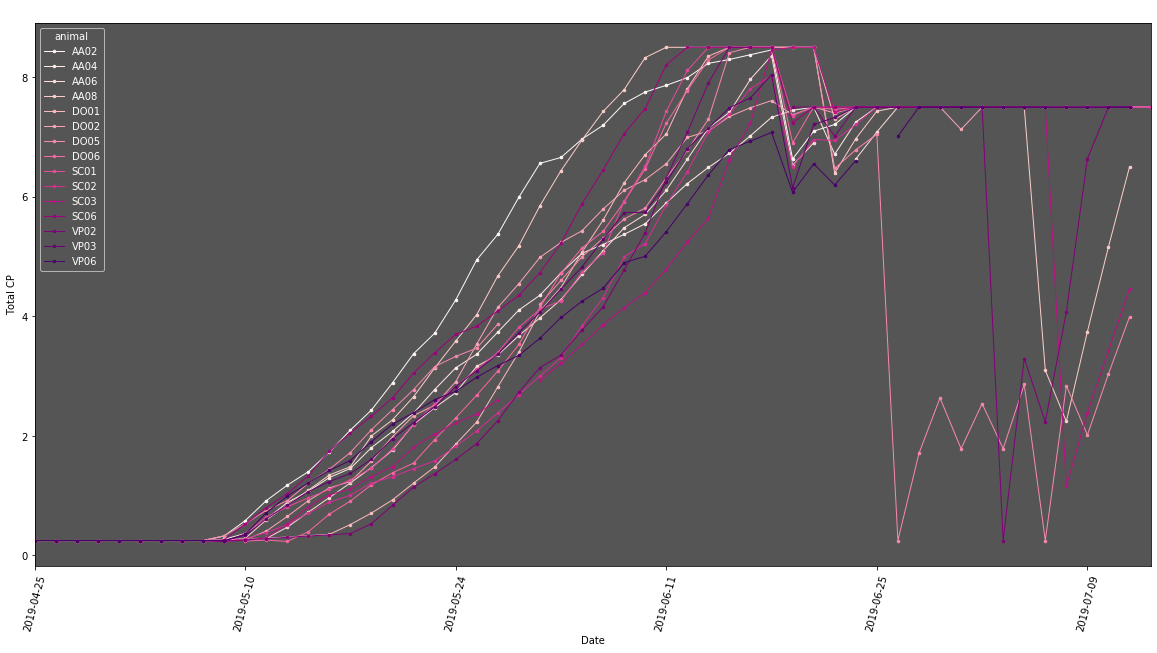

In [244]:
A_cp = A_df['total_CP']
A_cp.head()
A_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
plt.xticks( rotation = 75, fontsize= 'medium')
plt.ylabel('Total CP')
plt.xlabel('Date')
plt.title('Total_CP over time for each animal')



['AA02' 'AA04' 'AA06' 'AA08' 'DO01' 'DO02' 'DO05' 'DO06' 'SC01' 'SC02'
 'SC03' 'SC06' 'VP02' 'VP03' 'VP06']


Text(0.5, 1.0, 'Stage 0: Done trials for PWM animals')

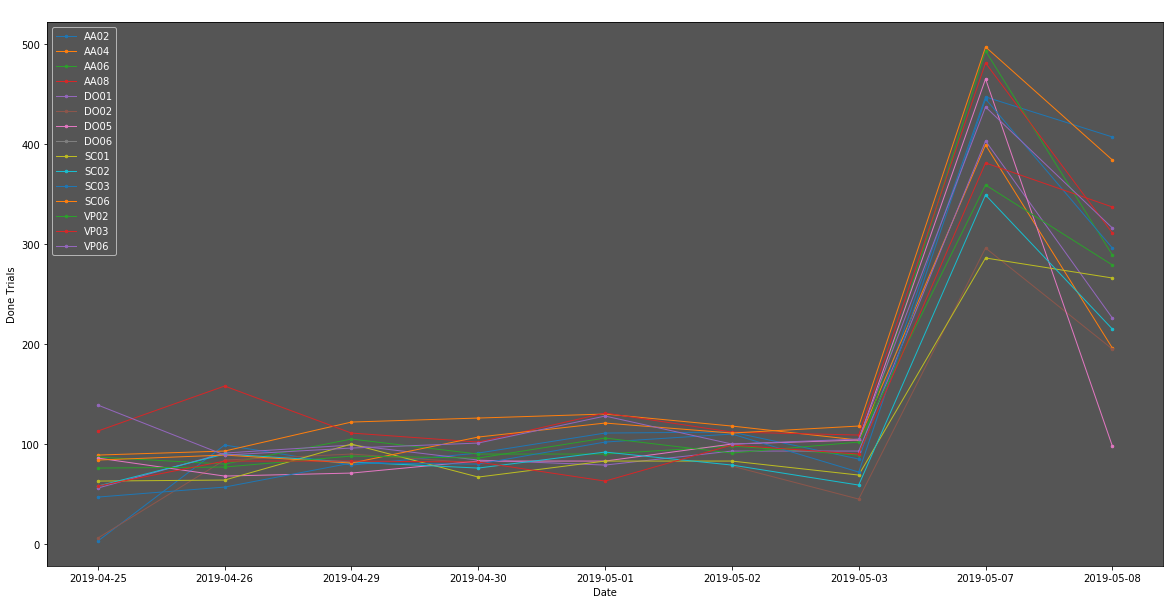

In [275]:
pwm = A_df.copy()
mask = pwm['stage']== 0
pwm1 = pwm[mask]
pwm_stage0 = pwm1
pwm_stage0.head()
pwm_stage0_cp = pwm_stage0['done_trials']
# pwm_real = pwm_stage0['done_trials'] - (pwm_stage0['done_trials']* pwm_stage0['violations'])
# would maybe be an idea to perform this operation higher up. 
list = pwm_stage0_cp.columns.values # get list to use for labelling
# plt.plot instead of df.plot fixed my problem with the x-axis, but the colors are worse, and legends are gone
# ideally figure out how to fix things in either
plt.plot(pwm_stage0_cp, marker='o',linewidth = 1.0, markersize = 2.5) #cmap=plt.cm.RdPu)
plt.legend(list)
plt.ylabel('Done Trials') 
plt.xlabel('Date')
plt.title('Stage 0: Done trials for PWM animals')
# figure out:
# how to change line colors by making a loop
# colormap = cmap=plt.cm.RdPu

